## Neural Networks: Building A Handwritten Digits Classifier

In this Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying handwritten digits. 

Scikit-learn contains a number of preloaded data sets. One of thems is [optical recognition of handwritten digits data set](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI which will be used in this project.
![image](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

### 1. Importing and exploring the dataset  

In [1]:
#Importing necessary modules and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


%matplotlib inline
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

Importing the digital images data set.

In [2]:
#Importing digits data set
from sklearn.datasets import load_digits
digit = load_digits()

digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
#Creating labels and data data sets
labels = pd.Series(digit['target'])

data = pd.DataFrame(digit['data'])
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


The dataset consists of 64 columns coming from pixels of 8x8 images. Each pixel is just represented as a brightness value ranging from 0 to 256 (greyscale).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

The data set contains 1797 digits images.

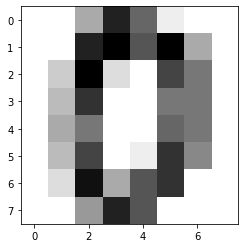

In [5]:
# Displaying the first image
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

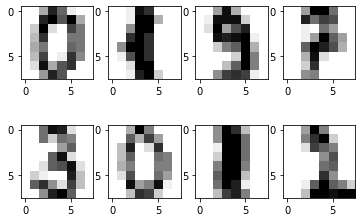

In [6]:
#Displaying the array of images
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

### 2. Reference - k-Nearest Neighbors algorithm

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows it to capture nonlinearity in the data. 
The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

We will use kNN as the reference for the Neural Networks model. We will perform 4-fold cross validation and check how the accuracy of the model changes depending on the k. 

In [7]:
#Training function
def train(train_features, train_labels, neighbor=5):
    knc = KNeighborsClassifier(n_neighbors=neighbor)
    knc.fit(train_features, train_labels)
    return knc

#Testing function
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    acc = accuracy_score(test_labels, predictions)
    return acc

#Cross-validation function
def cross_validation(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(train_features, train_labels, neighbor=k)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
    
#4-fold cross validation result
result = np.mean(cross_validation(4))
result

0.9833073496659243

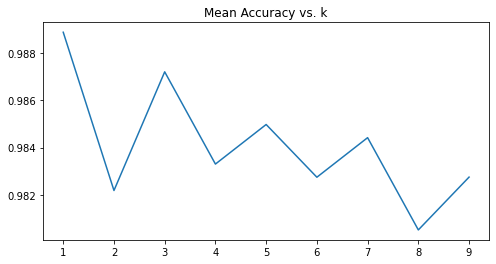

In [8]:
#Investigating the accuracy depending on k

k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = np.mean(cross_validation(k))
    k_overall_accuracies.append(k_accuracies)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

The highes accuracy was achieved for k=1. As we can see the accuracy decreases with the increasing k.

### 3. Neural Network with one hidden layer

We will train and test neural network using 4-fold cross validation for the following parameters:

   - a single hidden layer of 8 neurons,
   - a single hidden layer of 16 neurons,
   - a single hidden layer of 32 neurons,
   - a single hidden layer of 64 neurons,
   - a single hidden layer of 128 neurons,
   - a single hidden layer of 256 neurons.

In [9]:
#Training function
def train(train_features, train_labels, n):
    mlc = MLPClassifier(hidden_layer_sizes=(n), max_iter=1000, random_state=0)
    mlc.fit(train_features, train_labels)
    return mlc

#Testing function
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    acc = accuracy_score(test_labels, predictions)
    return acc

#Cross-validation function
def cross_validation(k, n):
    fold_accuracies = []
    kf = KFold(n_splits = k, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(train_features, train_labels, n)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

In [10]:
neurons = [8, 16, 32, 64, 128, 256]
nn_one_accuracies = []

for n in neurons:
    nn_accuracies = np.mean(cross_validation(4,n))
    nn_one_accuracies.append(nn_accuracies)
    
nn_one_accuracies

C:\Users\dszweda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dszweda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dszweda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.9181984657263054,
 0.952147983172482,
 0.9560418213313535,
 0.9705147240781985,
 0.9755209106656768,
 0.9777456075228904]

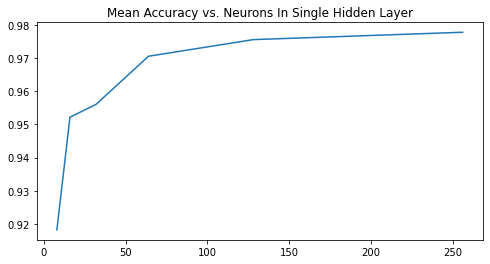

In [11]:
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

plt.plot(neurons, nn_one_accuracies)

It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 98%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

### 4. Neural network with two hidden layers

Modify the neural network training pipeline to use 2 hidden layers instead in the network.

We will train and test neural network using 4-fold cross validation for the following parameters:
  - 64 neurons in the first hidden layer,
  - 64 neurons in the second hidden layer.

In [12]:
#Training function
def train(train_features, train_labels, neuron_arch):
    mlc = MLPClassifier(hidden_layer_sizes=neuron_arch, max_iter=1000, random_state=0)
    mlc.fit(train_features, train_labels)
    return mlc

#Testing function
def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    acc = accuracy_score(test_labels, predictions)
    return acc

#Cross-validation function
def cross_validation(k, neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = k, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(train_features, train_labels, neuron_arch)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

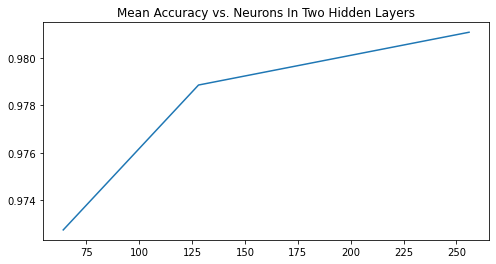

In [13]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = np.mean(cross_validation(4,n))
    nn_two_accuracies.append(nn_accuracies)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [14]:
nn_two_accuracies

[0.9727418955704034, 0.9788579559514972, 0.9810863647611978]

Using 2 hidden layers did not improved our simple accuracy. Using 2 hidden layers improved our simple accuracy to 98.4%. While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 0.6% in simple accuracy over the single hidden layer networks we tried earlier.

### 5. Neural network with three hidden layers

Modify the neural network training pipeline to use 3 hidden layers instead in the network.

We will train and test neural network using 4-fold cross validation for the following parameters:
   - Train a neural network model using 3 hidden layers:
       - 10 neurons in the first hidden layer,
       - 10 neurons in the second hidden layer,
       - 10 neurons in the third hidden layer.
   - Train a neural network model using 3 hidden layers:
       - 64 neurons in the first hidden layer,
       - 64 neurons in the second hidden layer,
       - 64 neurons in the third hidden layer.
   - Train a neural network model using 3 hidden layers:
       - 128 neurons in the first hidden layer,
       - 128 neurons in the second hidden layer,
       - 128 neurons in the third hidden layer.

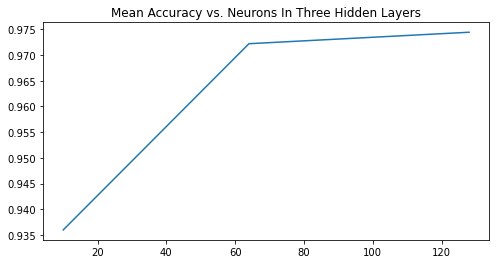

In [15]:
#Neural network with 3 hidden layers and 4 fold cross validation
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = np.mean(cross_validation(4,n))
    nn_three_accuracies.append(nn_accuracies)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [16]:
nn_three_accuracies

[0.9360009898539966, 0.9721813907448651, 0.9744085622370701]

Using 3 hidden layers returned a simple accuracy of nearly 97.5%.

### Summary
Interestingly the reference kNN algorithm achieved slightly better results (98.9%) than all investigated simple Neural Network (Multi-layer Perceptron Classifier) models (98.4%). From the tested NN the two hidden layer network with the 256 neurons gave the best results.